In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from statsmodels.api import qqplot
import seaborn as sns
import numpy as np

#### loading train.csv file

In [2]:
df_train=pd.read_csv('SalaryData_Train(1).csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train.shape

(30161, 14)

#### loading test.csv file

In [4]:
df_test=pd.read_csv('SalaryData_Test(1).csv')
df_test.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
4602,45,Local-gov,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,37,United-States,<=50K
2075,55,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,<=50K
9045,32,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
5887,35,Private,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7382,43,Private,5th-6th,3,Separated,Craft-repair,Not-in-family,Other,Male,0,0,40,Mexico,<=50K


In [5]:
df_test.shape

(15060, 14)

In [6]:
#merging our train and test data 
df = df_train.append(df_test)
df.reset_index(inplace=True,drop=True)
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [8]:
cat_values=[]
for i in df.columns:
    if(df[i].nunique()<45):
        cat_values.append(i)
cat_values

['workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [9]:
numerical_values=[]
for i in df.columns:
    if(df[i].nunique()>45):
        numerical_values.append(i)
numerical_values

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0
capitalloss,45221.0,88.548617,404.838249,0.0,0.0,0.0,0.0,4356.0
hoursperweek,45221.0,40.938038,12.007640,1.0,40.0,40.0,45.0,99.0


In [11]:
df.shape

(45221, 14)

## checking dupliactes and removing

In [12]:
df.duplicated().any()

True

In [13]:
df.duplicated().sum()

5982

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(39239, 14)

In [16]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [17]:
df['maritalstatus'].value_counts()

 Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

In [18]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [19]:
for i in df.columns:
    print(i)
    print(df[i].nunique())

age
74
workclass
7
education
16
educationno
16
maritalstatus
7
occupation
14
relationship
6
race
5
sex
2
capitalgain
121
capitalloss
97
hoursperweek
96
native
40
Salary
2


In [20]:
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
for x in cols:
    print(x,'\n',df[x].value_counts())

workclass 
  Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64
education 
  HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64
maritalstatus 
  Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
occupation 
  Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical     

## checking null values

In [21]:
df.isnull().any()

age              False
workclass        False
education        False
educationno      False
maritalstatus    False
occupation       False
relationship     False
race             False
sex              False
capitalgain      False
capitalloss      False
hoursperweek     False
native           False
Salary           False
dtype: bool

## Data visualization

In [22]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        
        labels=df[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [23]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="Salary", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "HeartDisease"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

In [24]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

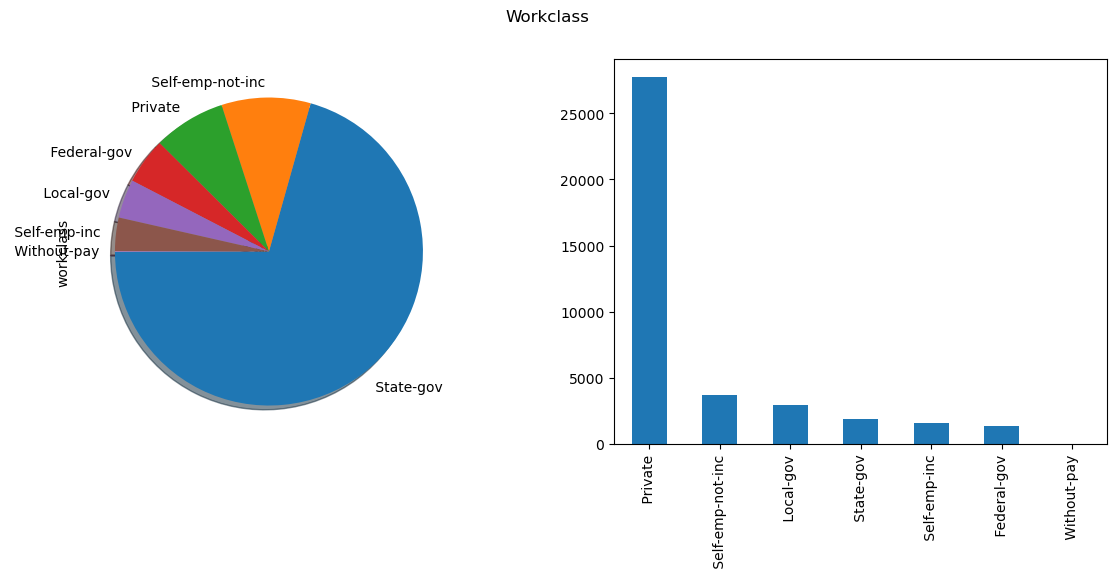

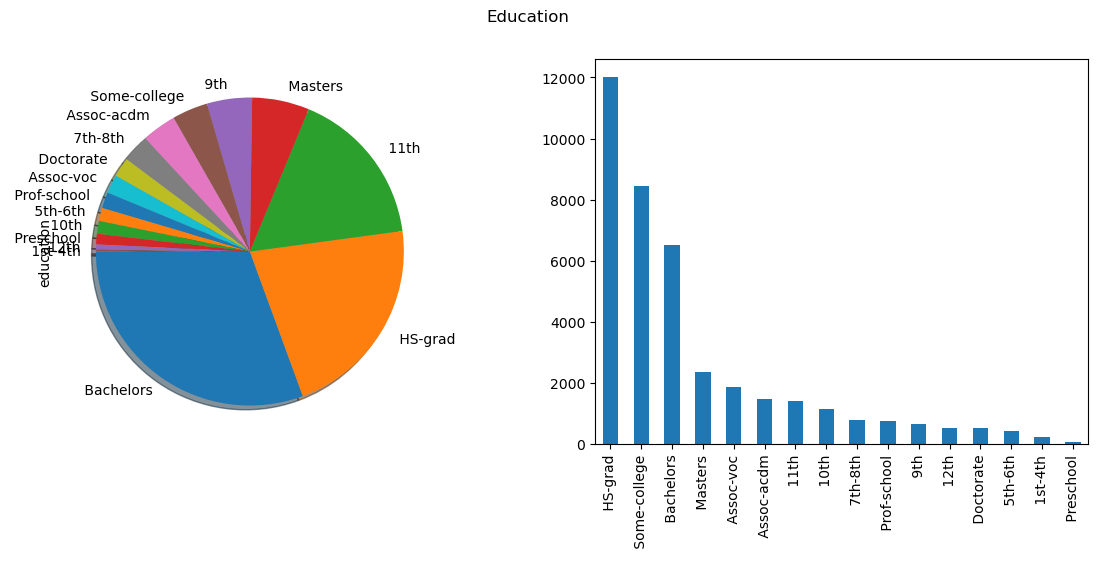

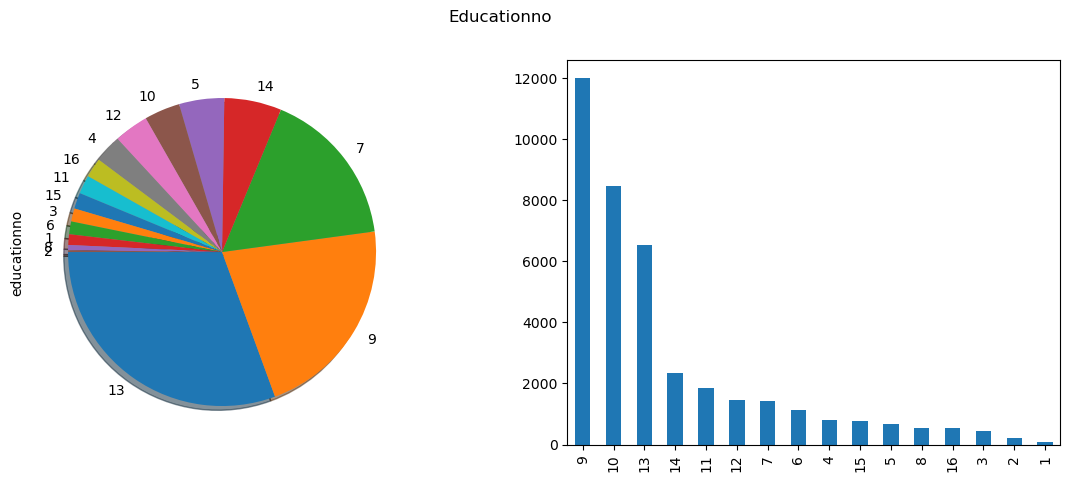

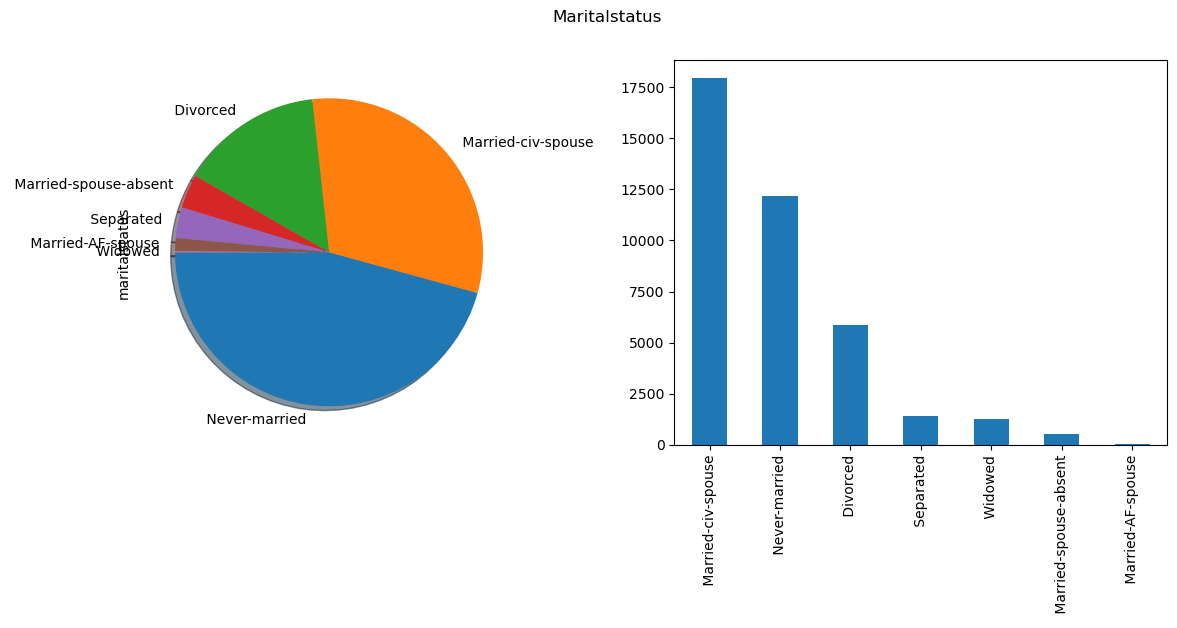

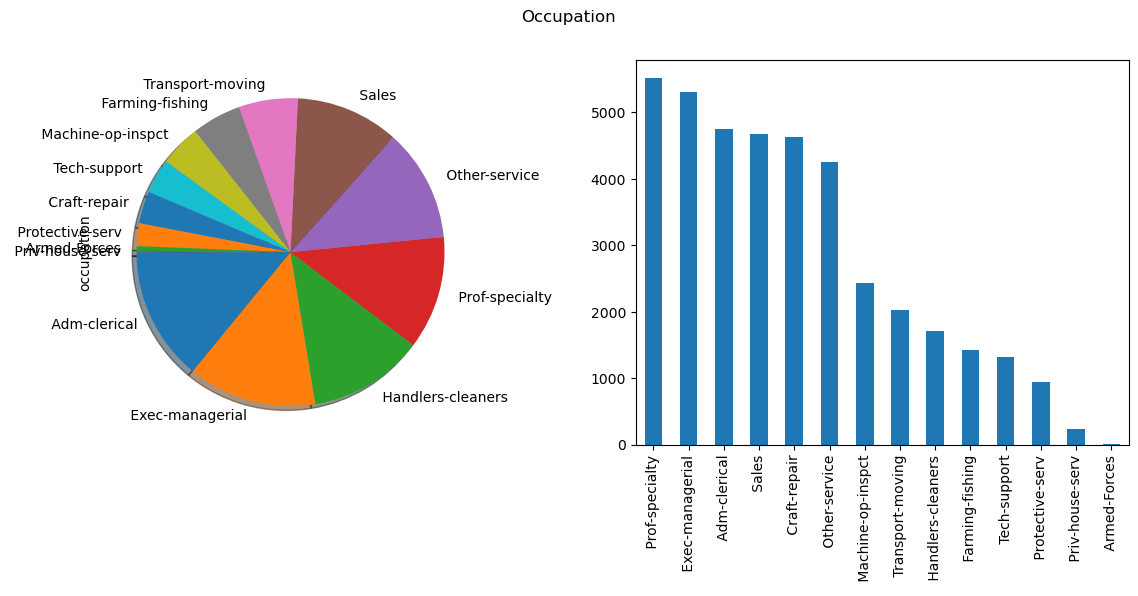

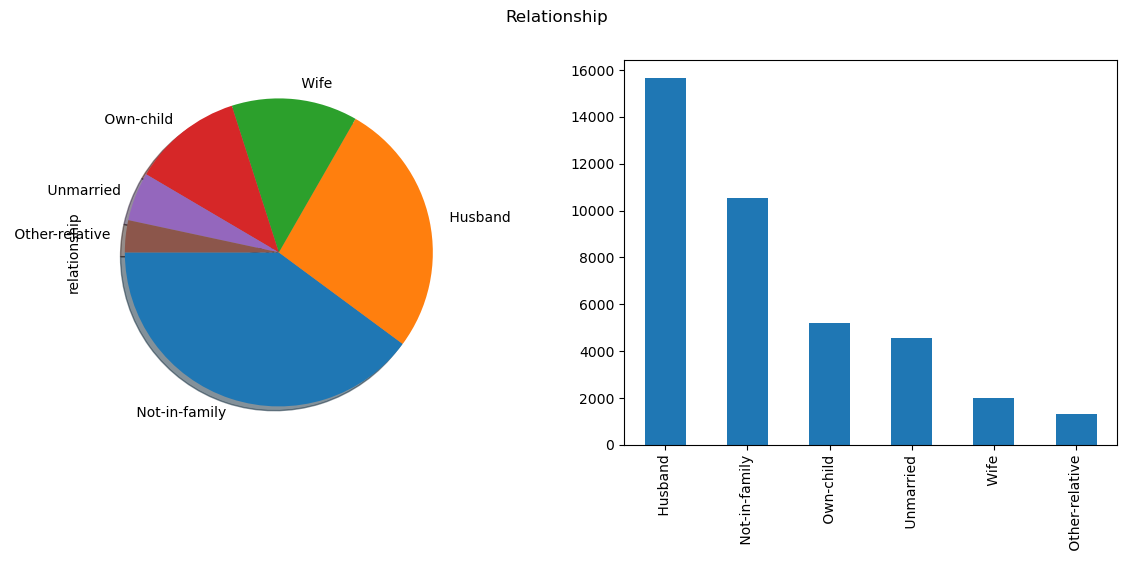

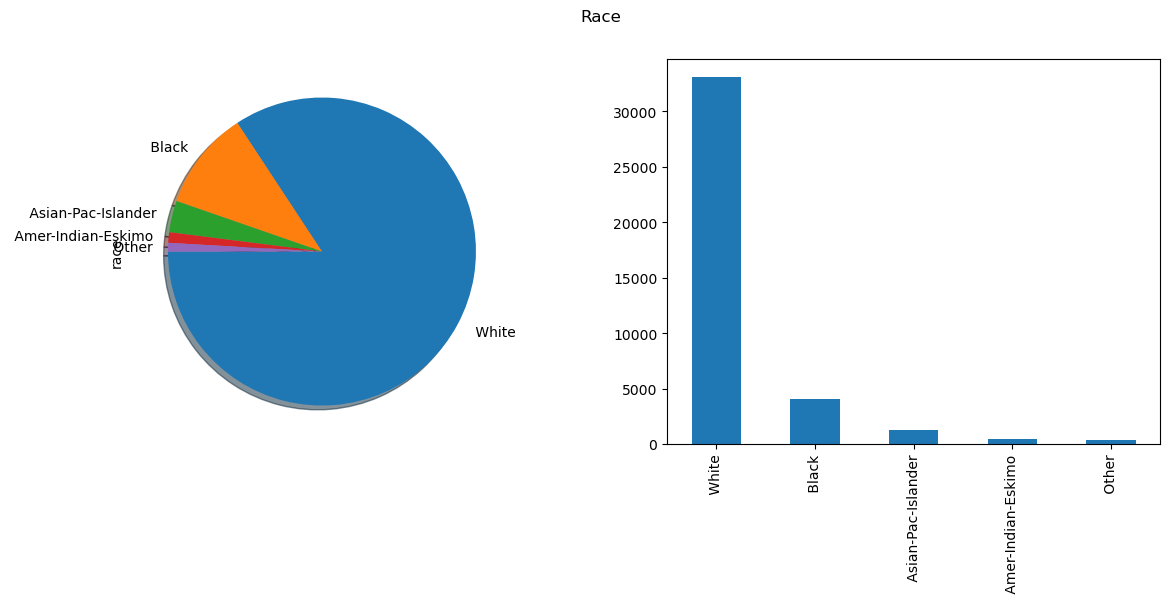

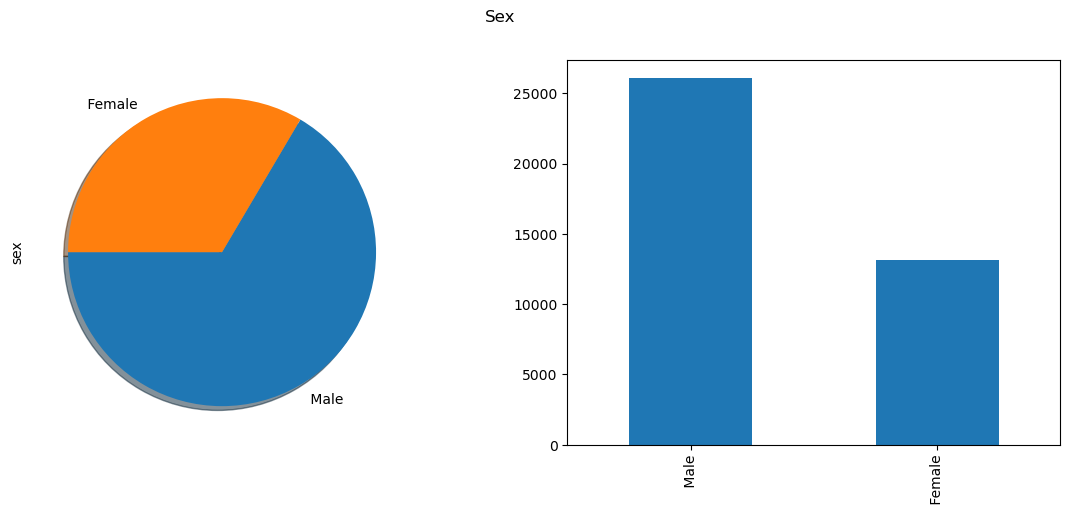

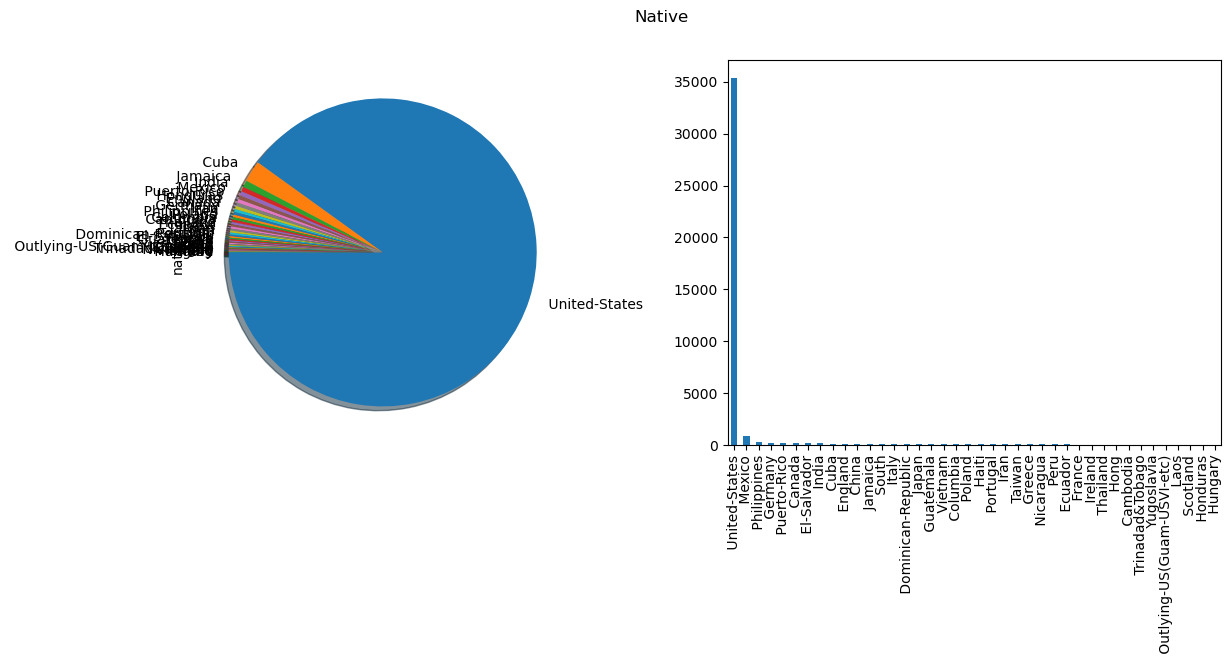

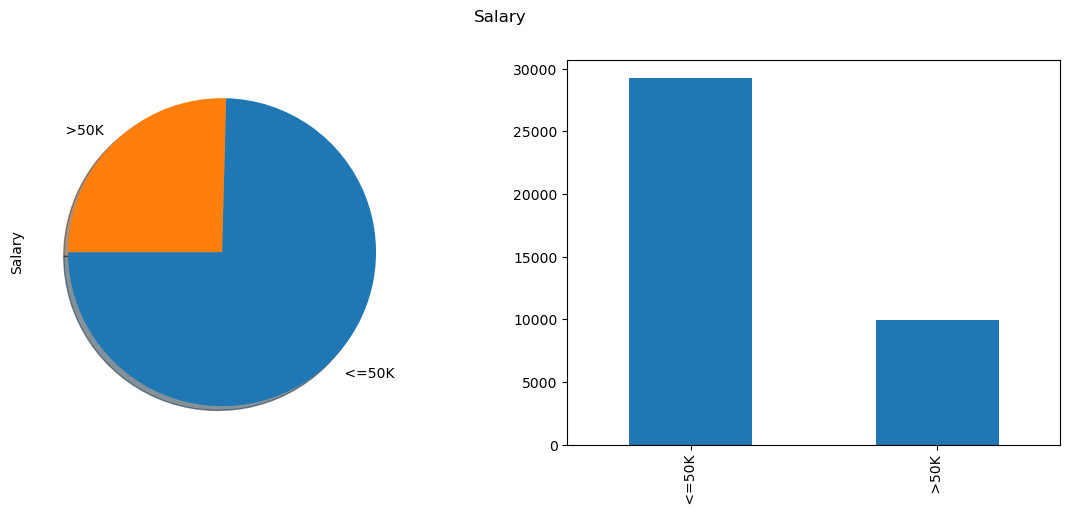

In [25]:
for i in cat_values:
    plot_categorial(i)

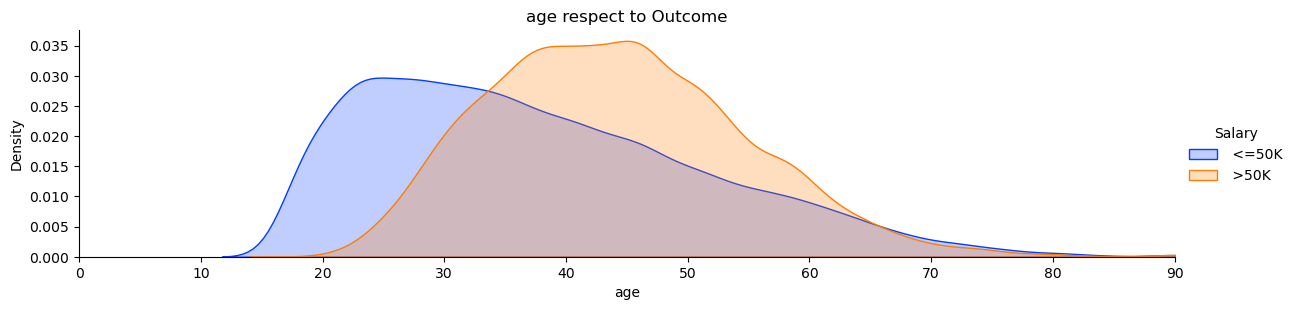

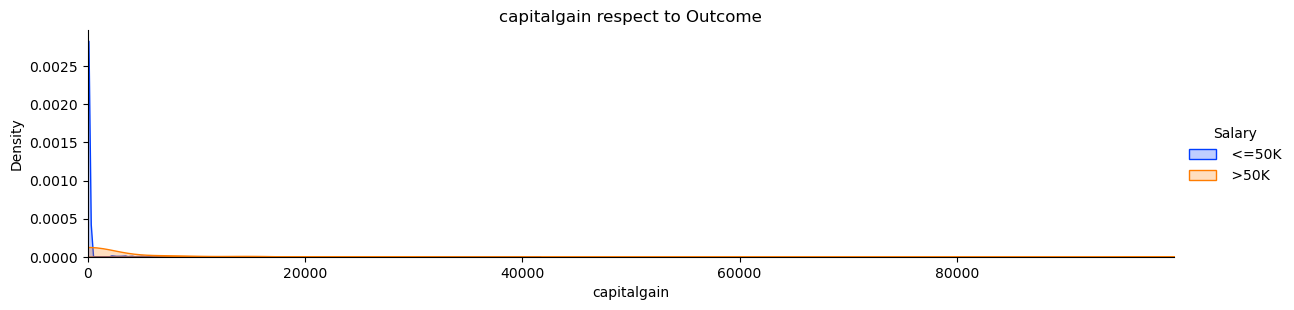

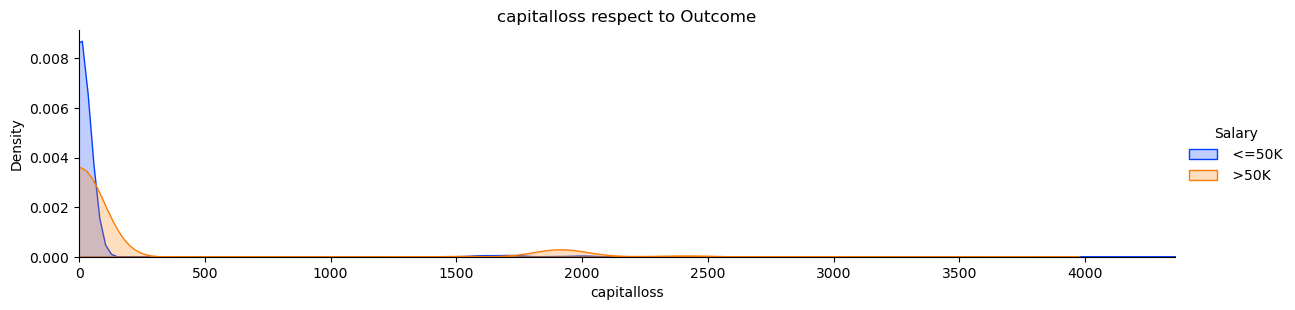

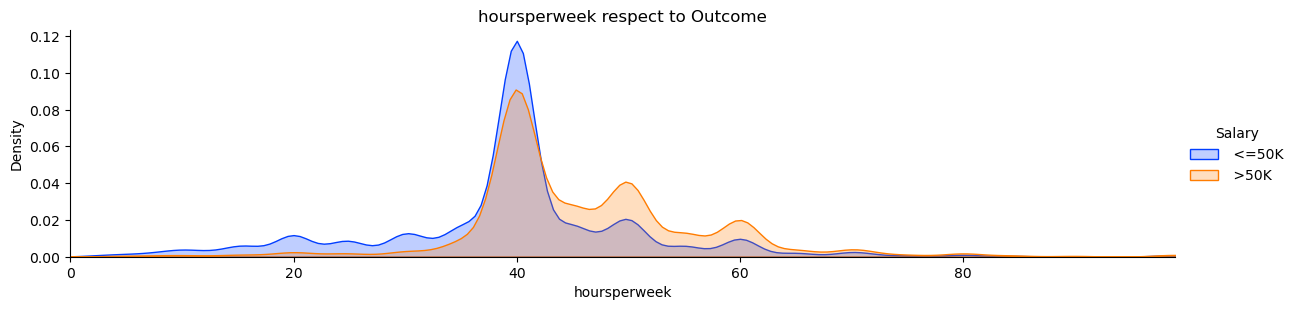

In [26]:
for i in numerical_values:
    plot_kde(i)

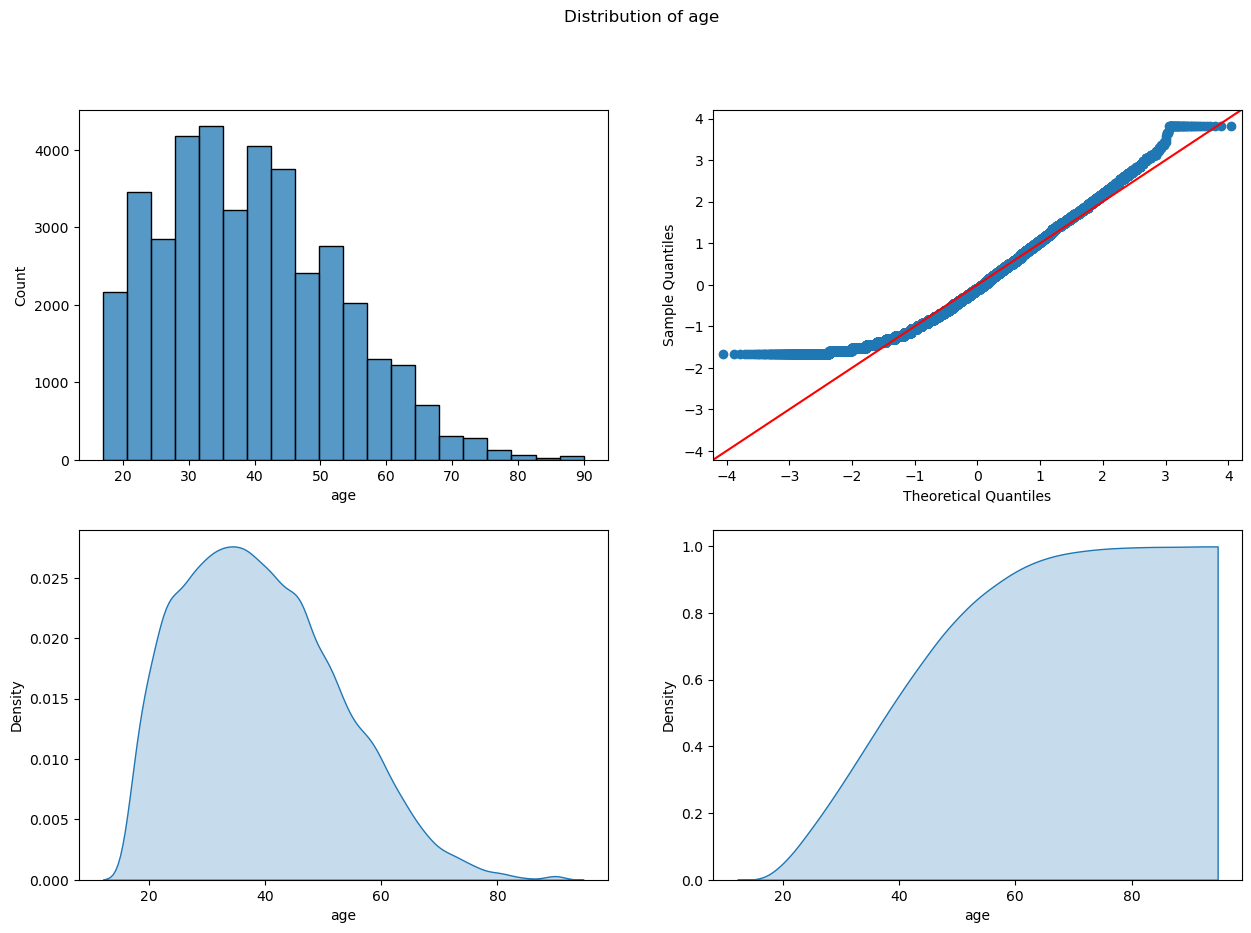

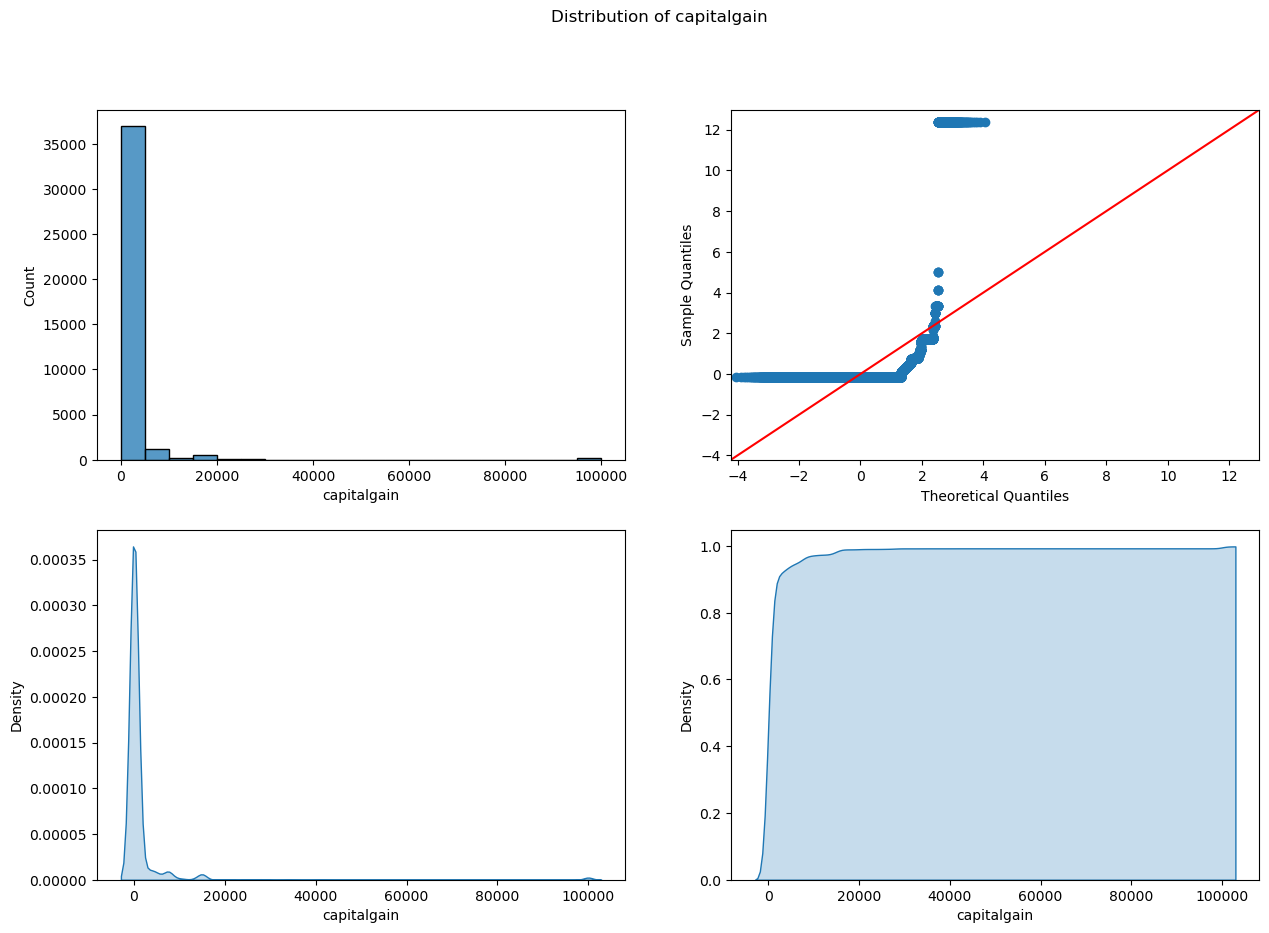

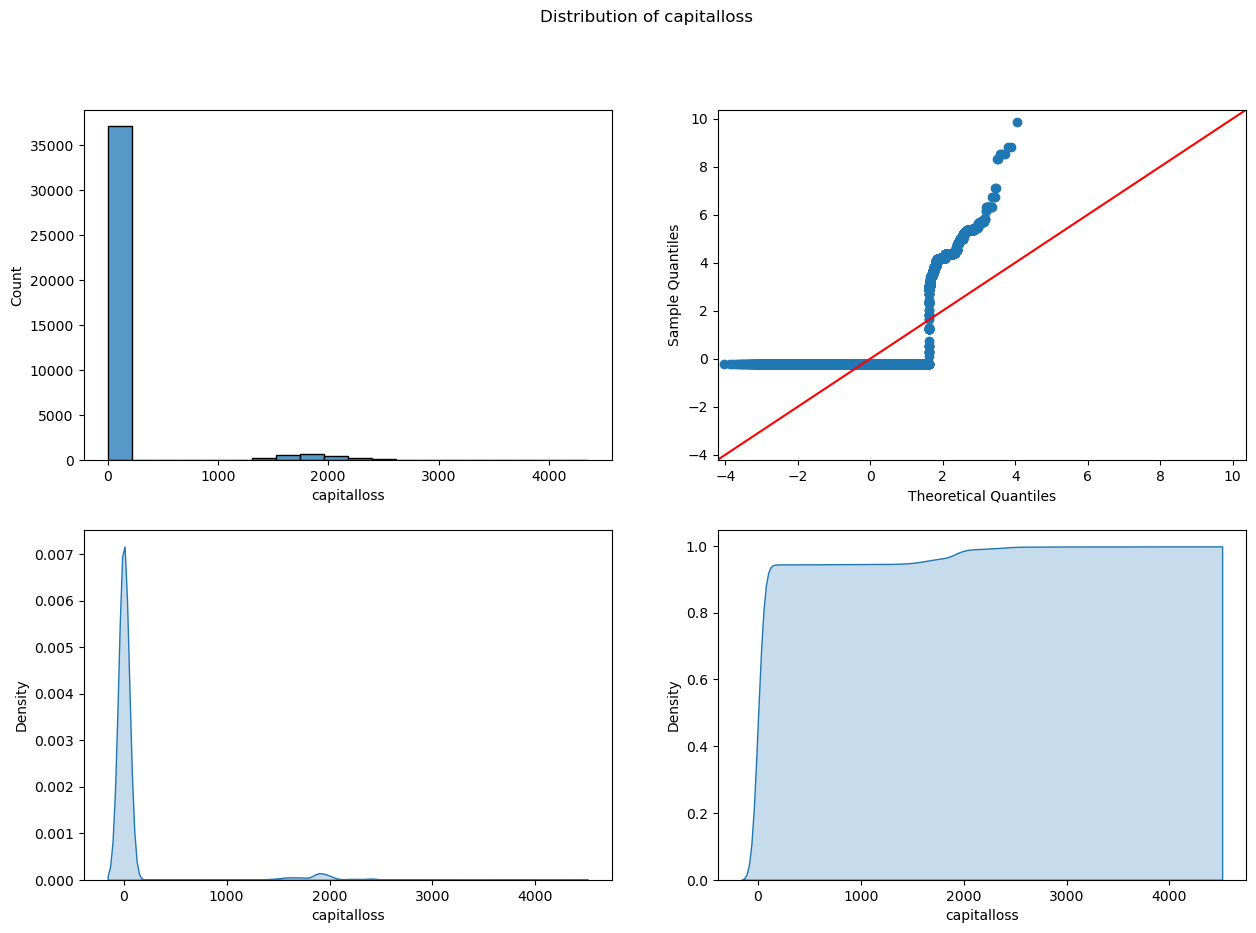

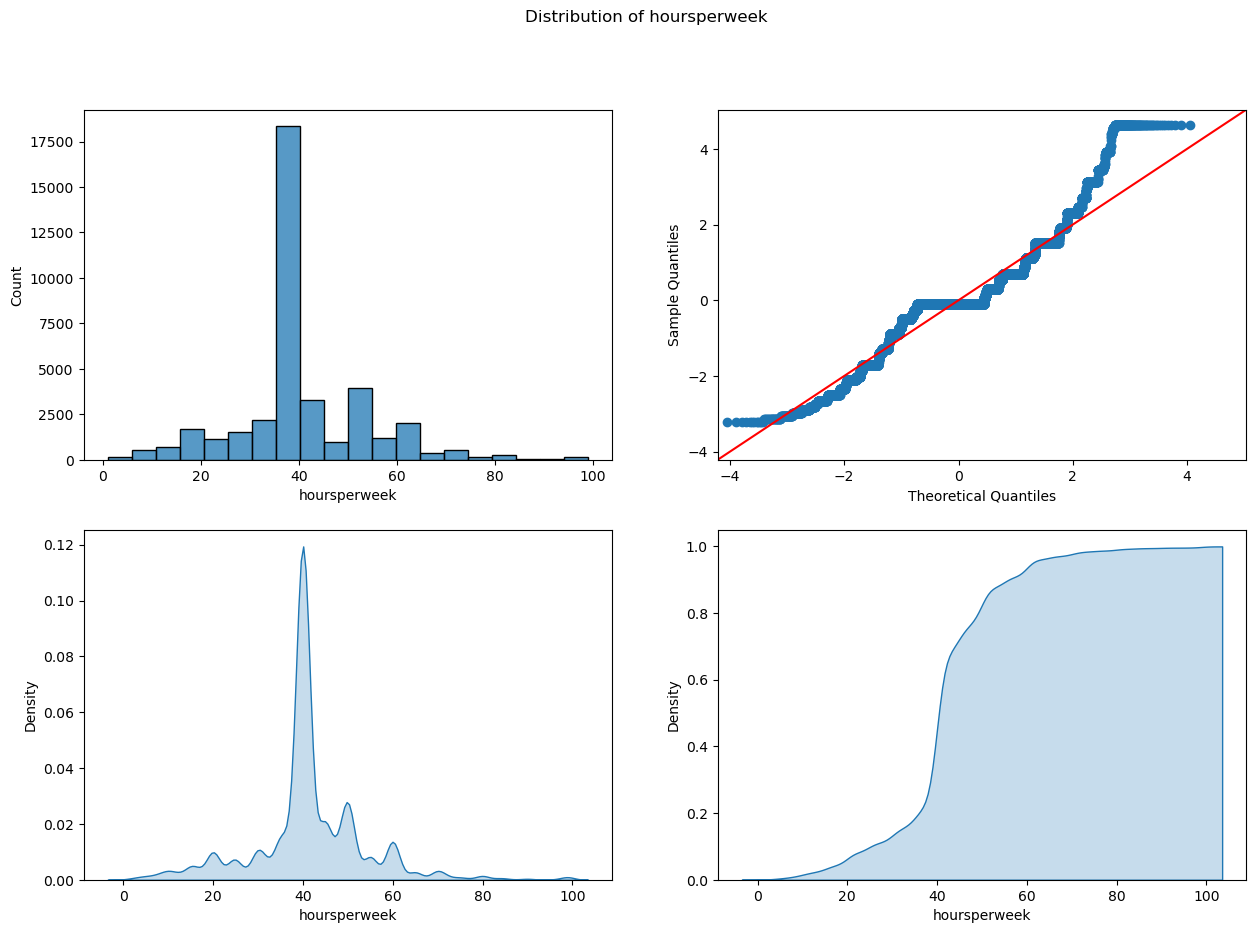

In [27]:
for i in numerical_values:
    plot_distribution(i)

In [28]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## converting categorical features

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()
df1=df.copy()
for x in cols:
    df1[x]=le.fit_transform(df1[x])
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [31]:
df1.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,2.228752,10.212824,10.136293,2.568618,6.076098,1.451566,3.638931,0.665078,1253.346186,101.207727,41.206121,35.202936,0.254211
std,13.298159,1.010177,3.882256,2.637228,1.538130,4.019794,1.618028,0.877948,0.471969,7994.096625,431.309171,12.458178,6.324275,0.435423
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,2.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,38.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,1.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


#### Doing feature selection

In [32]:
from sklearn.feature_selection import chi2,SelectKBest
best_fit=SelectKBest(score_func=chi2,k=10)

In [33]:
X=df1.drop('Salary',axis=1)
y=df1['Salary']

In [34]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [35]:
fit=best_fit.fit(X,y)


In [36]:
df_scores=pd.DataFrame(fit.scores_)
df_cols=pd.DataFrame(X.columns)

In [37]:
scores=pd.concat([df_cols,df_scores],axis=1)
scores.columns=['columns','scores']
scores

,columns,scores
0,age,8.105433e+03
1,workclass,4.370746e+00
2,education,5.220859e+02
3,educationno,2.924250e+03
4,maritalstatus,1.192197e+03
5,occupation,2.581447e+02
6,relationship,4.244822e+03
7,race,5.158074e+01
8,sex,5.957462e+02
9,capitalgain,1.072467e+08


In [38]:
scores1=scores.drop([10,9],axis=0)

<Axes: >

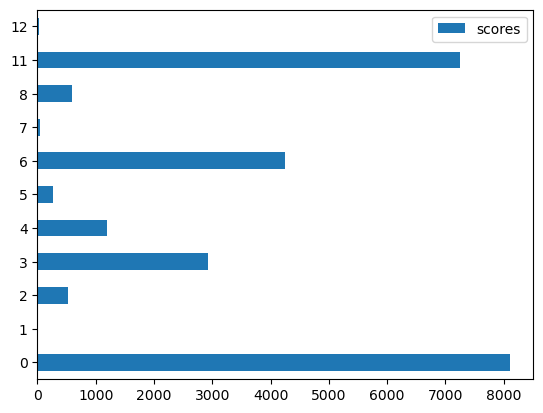

In [39]:
scores1.plot(kind='barh')

## scaling

In [40]:
X=df1.drop(['Salary','native','workclass','race'],axis=1)
y=df['Salary']
X.head()

,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek
0,39,9,13,4,0,1,1,2174,0,40
1,50,9,13,2,3,0,1,0,0,13
2,38,11,9,0,5,1,1,0,0,40
3,53,1,7,2,5,0,1,0,0,40
4,28,9,13,2,9,5,0,0,0,40


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [43]:
X_scaled

array([[-0.02326754, -0.31240583,  1.08589165, ...,  0.11516818,
        -0.23465538, -0.09681487],
       [ 0.80392517, -0.31240583,  1.08589165, ..., -0.15678597,
        -0.23465538, -2.26409357],
       [-0.09846688,  0.2027651 , -0.43087196, ..., -0.15678597,
        -0.23465538, -0.09681487],
       ...,
       [-0.02326754, -0.31240583,  1.08589165, ..., -0.15678597,
        -0.23465538, -0.41789319],
       [ 0.35272914, -0.31240583,  1.08589165, ...,  0.52560127,
        -0.23465538, -0.09681487],
       [-0.32406489, -0.31240583,  1.08589165, ..., -0.15678597,
        -0.23465538,  1.50857677]])

In [44]:
X=X_scaled

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=45)

## model building

In [46]:
from sklearn.svm import SVC

In [47]:
model=SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')

In [48]:
model.fit(X_train,y_train)

SVC(C=0.1, degree=2, gamma=0.1, kernel='linear')

## Model Evaluation

In [49]:
model.score(X_test,y_test)## accuracy

0.8038990825688074

In [50]:
y_pred=model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      5771
        >50K       0.82      0.33      0.47      2077

    accuracy                           0.80      7848
   macro avg       0.81      0.65      0.68      7848
weighted avg       0.81      0.80      0.77      7848



In [53]:
cm=confusion_matrix(y_test,y_pred)

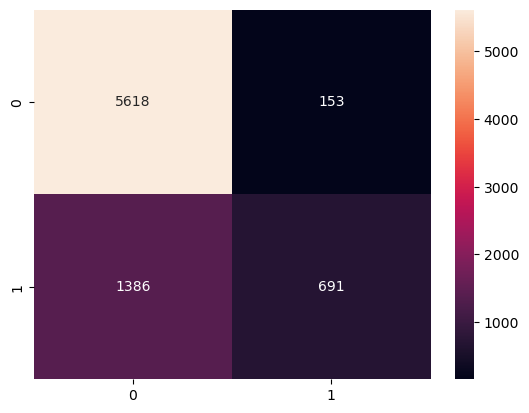

In [54]:
sns.heatmap(cm,annot=True,fmt='g')
plt.show()